In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [35]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")

Number of GPU = 0


In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#5): Which is digit '2'


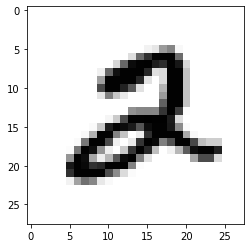

In [38]:
digit = 5 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

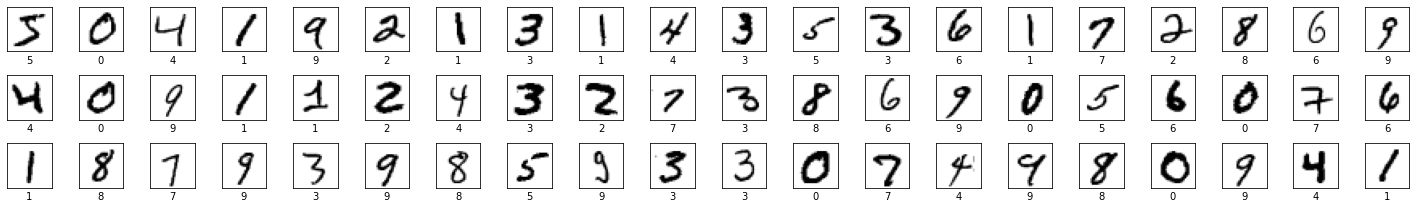

In [39]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [40]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#5): Which is digit '2'


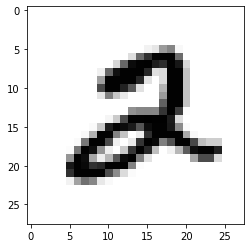

In [41]:
digit = 5 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [42]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [44]:
h = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_split=0.4)


Epoch 1/15
563/563 [==============================] - 7s 11ms/step - loss: 0.2876 - accuracy: 0.9157 - val_loss: 0.1664 - val_accuracy: 0.9501
Epoch 2/15
563/563 [==============================] - 7s 12ms/step - loss: 0.1109 - accuracy: 0.9676 - val_loss: 0.1285 - val_accuracy: 0.9619
Epoch 3/15
563/563 [==============================] - 5s 9ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.1158 - val_accuracy: 0.9655
Epoch 4/15
563/563 [==============================] - 6s 10ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.1217 - val_accuracy: 0.9660
Epoch 5/15
563/563 [==============================] - 5s 9ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.1137 - val_accuracy: 0.9694
Epoch 6/15
563/563 [==============================] - 6s 10ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.1068 - val_accuracy: 0.9716
Epoch 7/15
563/563 [==============================] - 5s 9ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.1049 - val_accuracy: 0.9730
Ep

In [45]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [46]:
h1 = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_split=0.4)


Epoch 1/15
563/563 [==============================] - 5s 8ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.1287 - val_accuracy: 0.9753
Epoch 2/15
563/563 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1266 - val_accuracy: 0.9756
Epoch 3/15
563/563 [==============================] - 5s 10ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1255 - val_accuracy: 0.9758
Epoch 4/15
563/563 [==============================] - 4s 7ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.1248 - val_accuracy: 0.9758
Epoch 5/15
563/563 [==============================] - 4s 7ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.1243 - val_accuracy: 0.9759
Epoch 6/15
563/563 [==============================] - 5s 10ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.1239 - val_accuracy: 0.9760
Epoch 7/15
563/563 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.1237 - val_accuracy: 0.9760
Epoc

In [47]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [48]:
h2 = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_split=0.4)


Epoch 1/15
563/563 [==============================] - 7s 12ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1450 - val_accuracy: 0.9767
Epoch 2/15
563/563 [==============================] - 5s 10ms/step - loss: 2.3941e-04 - accuracy: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9782
Epoch 3/15
563/563 [==============================] - 6s 11ms/step - loss: 5.5407e-05 - accuracy: 1.0000 - val_loss: 0.1421 - val_accuracy: 0.9783
Epoch 4/15
563/563 [==============================] - 5s 9ms/step - loss: 2.6169e-05 - accuracy: 1.0000 - val_loss: 0.1457 - val_accuracy: 0.9786
Epoch 5/15
563/563 [==============================] - 5s 9ms/step - loss: 1.9745e-05 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 0.9784
Epoch 6/15
563/563 [==============================] - 6s 10ms/step - loss: 1.6630e-05 - accuracy: 1.0000 - val_loss: 0.1487 - val_accuracy: 0.9786
Epoch 7/15
563/563 [==============================] - 5s 9ms/step - loss: 1.4342e-05 - accuracy: 1.0000 - val_loss: 0.1507 -

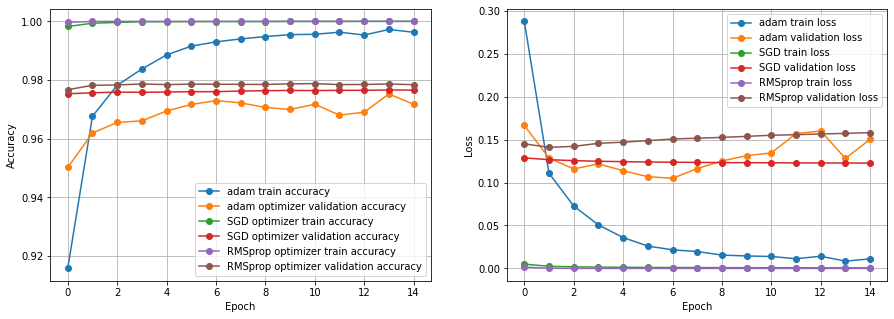

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='adam train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'adam optimizer validation accuracy')

plt.plot(h1.history['accuracy'], 'o-', label='SGD optimizer train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'SGD optimizer validation accuracy')

plt.plot(h2.history['accuracy'], 'o-', label='RMSprop optimizer train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'RMSprop optimizer validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='adam train loss')
plt.plot(h.history['val_loss'], 'o-', label='adam validation loss')

plt.plot(h1.history['loss'], 'o-', label='SGD train loss')
plt.plot(h1.history['val_loss'], 'o-', label='SGD validation loss')

plt.plot(h2.history['loss'], 'o-', label='RMSprop train loss')
plt.plot(h2.history['val_loss'], 'o-', label='RMSprop validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9812

Test accuracy: 0.9811999797821045


In [51]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


4/4 [==============================] - 0s 3ms/step


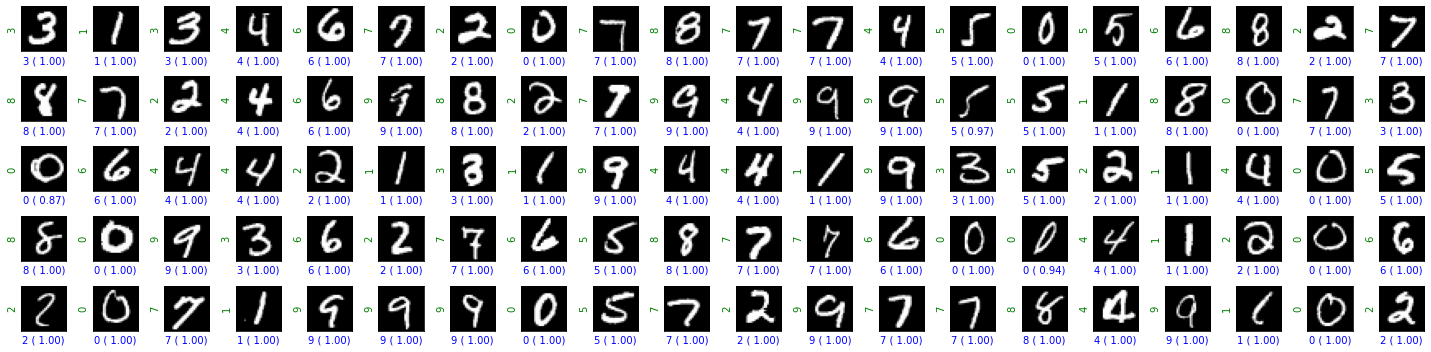

In [52]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [53]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 [==============================] - 0s 64ms/step


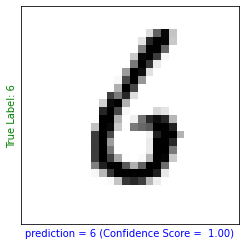

In [55]:
test(50)

1/1 [==============================] - 0s 42ms/step


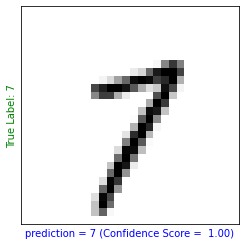

In [56]:
test(2490)

1/1 [==============================] - 0s 42ms/step


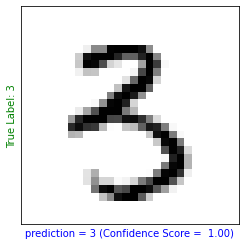

In [58]:
test(5000)


1/1 [==============================] - 0s 26ms/step


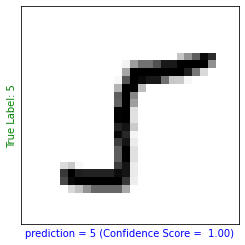

In [59]:
test(9877)


1/1 [==============================] - 0s 28ms/step


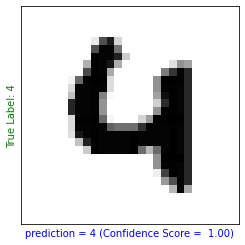

In [60]:
test(762)

1/1 [==============================] - 0s 30ms/step


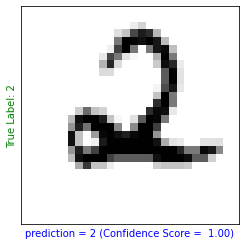

In [61]:
test(2350)